**1. Data Exploration**
* Load dataframes
* Know the size of the dataframes
* Familiarize with the fields
* Identify the type of variables
* Perform basic statistics

** Loading Datasets**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
% matplotlib inline


In [21]:
#download the dataset
URL = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTje8zKd8O6t_YkUCmkpYkgPHBjiUyriSWrIjmuVcjzwcqxeKcEuMSqE9QIHUH48TiQC1bDiWDTJ6Fy/pub?gid=1546906149&single=true&output=csv'
test = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTje8zKd8O6t_YkUCmkpYkgPHBjiUyriSWrIjmuVcjzwcqxeKcEuMSqE9QIHUH48TiQC1bDiWDTJ6Fy/pub?gid=1546906149&single=true&output=csv')

URL = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTLJsSx7O86RwalnT64MfH1c4VoNM4kYMCJLoVXv469hJK3QSdn_cOuRPEwBiUTH5DLgc-BaB8AEiVc/pub?gid=1782604670&single=true&output=csv'
train = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTLJsSx7O86RwalnT64MfH1c4VoNM4kYMCJLoVXv469hJK3QSdn_cOuRPEwBiUTH5DLgc-BaB8AEiVc/pub?gid=1782604670&single=true&output=csv')



** What does the data look like?**

To learn the data types, missing values so I could know how to prepare and convert the dataset.


In [22]:
#1. The first five observations
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
#2 what is the size of the dataframe?
train.shape

(891, 12)

In [176]:
#3. What are the data types?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [177]:
#4 How many missing values?
#Looks like we can't fully rely on Age and Cabin. We need to figure out a way on how to predict the values of these fields especially Age.
# Since Embarked only has 2 missing values we fill them in using mean, median, or mode
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [178]:
#5. Basic Statistics
#39% of the data survied
#average fare is $32
#the younges passenger is around five months old and the oldest is 80 years old
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [179]:
#6. Number of unique Values
train.nunique()
#Tickets have dupes
#Cabin have dupes

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**2. Data Visualization**

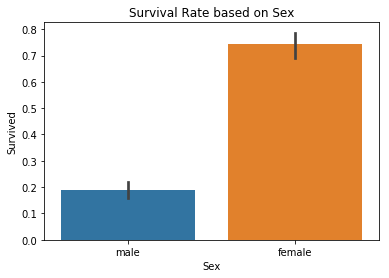

In [180]:
sns.barplot(x='Sex',y='Survived',data=train).set_title('Survival Rate based on Sex')
plt.show()

In [181]:
#Filling in missing Embarked values
train[train.Embarked.isnull()]
#both are female Pclass1 survivors, paid $80, and travelled alone (although PassengerID 830 looks like have 2 Nmaes registered?)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [182]:
#Determining how many passengers per observation / per ticket
train['No_of_Passengers_on_Ticket']= train['SibSp'] + train['Parch'] + 1 #+1 for those travelling alone

#Adding a column called 'Group Size' to better segment the observation
#Solo - 1 traveller
#Couple - 2 travellers
#Mid - 3 to 5 travellers
7#Large - 6+ travellers
train['Group_Size'] = np.where(train.No_of_Passengers_on_Ticket==1, 'Solo',
                                    np.where(train.No_of_Passengers_on_Ticket==2, 'Couple', 
                                             np.where(np.logical_and(train.No_of_Passengers_on_Ticket>2, train.No_of_Passengers_on_Ticket<6),'Mid',
                                                      'Large')))
train[train.Embarked.isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,No_of_Passengers_on_Ticket,Group_Size
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,Solo
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,Solo


In [183]:
#We know that the missing values are Female passengers, Pclass 1, fare=$80, both travelling alone
Pclass1 = train[(train['Sex']=='female') & (train['Pclass']==1) & (train['Group_Size']=='Solo')]
#Pclass1[['Embarked', 'Fare']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Fare', ascending=False)
Pclass1[['Embarked', 'Fare']].groupby(['Embarked'], as_index=False).describe()


Fare                                                                    \
  count        mean         std      min        25%       50%         75%   
0  18.0  120.692128  114.340311  27.7208  60.021900  81.17915  135.349975   
1  14.0   90.728571   56.000006  25.9292  41.989575  86.50000  125.099975   

             
        max  
0  512.3292  
1  211.3375

In [184]:
#The mean closest to $80 is Southampton. It also has the smaller standard deviation 
Pclass1[['Embarked', 'Fare']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Fare', ascending=False)

,Embarked,Fare
0,C,120.692128
1,S,90.728571


In [203]:
train.Embarked.fillna('S', inplace=True) #filling in missing Embarked with S

In [204]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


**Age**

Age has 177 NaN values, we are going to fill in the missing values using Mean Imputation. Moreover, the prediction model could fit the model.


In [205]:
train['Age'].fillna(train.Age.mean(), inplace=True)
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,No_of_Passengers_on_Ticket
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


Text(0.5,1,'Age and Pclass')

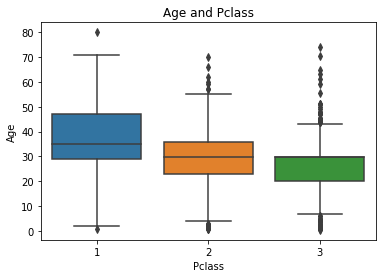

In [206]:
sns.boxplot(y='Age',x='Pclass', data=train).set_title('Age and Pclass')

** From visualizing the data, we have observed:**

1. There are twice as much male(65%)than demale(35%) passengers
2. Socio-economic status played part in survival, having Pcalss 1 passengers with the highest surval rate at 63%

**3 Data Wrangling**
* Converting Strings into Categorical Values
* Cleaning / Removing Categorical Values
* Most survivors travelled alone and in two's and most of them are 30 years old.




In [208]:
Sex = pd.get_dummies(train['Sex'], drop_first=True)
Embarked_New = pd.get_dummies(train['Embarked'], drop_first=True)
Pclass_New = pd.get_dummies(train['Pclass'], drop_first=True)
train_n = pd.concat([train,Sex,Embarked_New,Pclass_New],axis=1)
train_n.drop(columns=['Sex','Pclass','Embarked','Name','PassengerId','Ticket','Group_Size'],axis=1, inplace=True)

In [209]:
train_n.rename(columns={'male':'Sex', 'Q':'Queenstown', 'S':'Southampton',2:'Pclass2',3:'Pclass3'}, inplace=True)
train_n.head()

,Survived,Age,SibSp,Parch,Fare,No_of_Passengers_on_Ticket,Sex,Queenstown,Southampton,Pclass2,Pclass3
0,0,22.0,1,0,7.2500,2,1,0,1,0,1
1,1,38.0,1,0,71.2833,2,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,2,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,1,0,1,0,1


**4. Predictions**


1. Logistic Regression
Conduct logictistic regression dependent variable is binary. 

In [210]:
# Preparing the data
X = train_n.drop(['Survived'], axis=1)
y = train_n.Survived

In [211]:
#building the logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
logmodel = LogisticRegression()
#fitting the model
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [212]:
#make predictions
prediction = logmodel.predict(X_test)

In [213]:
# Examining the Prediction
#calculate precision and recall
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'             precision    recall  f1-score   support\n\n          0       0.77      0.88      0.82       153\n          1       0.80      0.65      0.72       115\n\navg / total       0.78      0.78      0.78       268\n'

In [214]:
#look at the confusion matrix to justify Precision and Recall
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[134,  19],
       [ 40,  75]])

**Observation**

The precision is 78% which is high. 

Precision is the number of True Positives divided by the number of True Positive and False Positives

Recall is the number if True Positives divided by the number if True Positives and the number of False Negatives.

134 - True Positive

75 - True Negative

19 - False POsitive(Type 1 Error)

40 - False Negative(Tyep 2 Error)


In [215]:
#calculate the accuracy score - from the confusion matrix
#Number of correct predictions
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)
#we have 77% accuracy, which is still pretty good

0.7798507462686567

** Using the Test Data **

In [216]:
#Preparing the data
Sex = pd.get_dummies(test['Sex'], drop_first=True)
Emb = pd.get_dummies(test['Embarked'], drop_first=True)
Pcl = pd.get_dummies(test['Pclass'], drop_first=True)
test_n = pd.concat([test, Sex, Emb, Pcl], axis=1)

#Matching the train data's column labels
test_n.drop(columns=['PassengerId', 'Ticket', 'Pclass', 'Name', 'Sex', 'Cabin', 'Embarked'], axis=1, inplace=True)
test_n['No_of_Passengers_on_Ticket'] = test_n.SibSp + test_n.Parch + 1

In [217]:
test_n.rename(columns={'male':'Sex', 'Q':'Queenstown', 'S':'Southampton',2:'Pclass2',3:'Pclass3'}, inplace=True)
test_n.head()

#checking if the test data has null values
#test_n.isnull().sum()

#Dropping the null values of the test data
X_n_test = test_n.dropna(how='any')

In [218]:
test_n.shape

(418, 10)

In [219]:
X_n_test.shape

(331, 10)

In [220]:
#X_n_test is still a decent sample size, we still have 79% of the actual test data
331/418

0.7918660287081339

In [221]:
# Preparing the data
X_train1 = train_n.drop(['Survived'], axis=1)
y_train1 = train_n.Survived

#building the logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Train data has a 891 observations, while Testa data has 331 observations
#Using 331/891 = 37% of the Train data as the test size, so that I can compare and plug the Test data later on
X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1, test_size=.3714, random_state=1)
logmodel = LogisticRegression()

#fitting the model
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [222]:
#predict from the train set
prediction = logmodel.predict(X_test)

In [223]:
#Examining the Prediction
#calculate precision and recall
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'             precision    recall  f1-score   support\n\n          0       0.77      0.85      0.81       192\n          1       0.76      0.65      0.70       139\n\navg / total       0.77      0.77      0.76       331\n'

In [224]:
#calculate the accuracy score - from the confusion matrix
#Number of correct predictions
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)
#we have 77% accuracy, which is still pretty decent

0.7673716012084593

In [225]:
#predict from the test set
prediction2 = logmodel.predict(X_n_test)

In [226]:
# Examining the Prediction
#calculate precision and recall
from sklearn.metrics import classification_report
classification_report(y_test,prediction2)

'             precision    recall  f1-score   support\n\n          0       0.57      0.59      0.58       192\n          1       0.40      0.38      0.39       139\n\navg / total       0.50      0.50      0.50       331\n'

In [227]:
#look at the confusion matrix to justify Precision and Recall
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction2)

array([[114,  78],
       [ 86,  53]])

In [228]:
#calculate the accuracy score - from the confusion matrix
#Number of correct predictions
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction2)
#we have 50% accuracy, it's not good... need to improve the prediction model

0.5045317220543807

2. KNN cross validation

In [229]:
X_train2 = train_n.drop(['Survived'], axis=1)
y_train2 = train_n.Survived

X_train, X_test, y_train, y_test = train_test_split(X_train2, y_train2, test_size=.3714, random_state=2)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#check classification accuracy of KNN with K=16 
#the bigger the K, the less likely an error will occur, 10 is a good start to fine tuning K
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)
#from 10 to 33, K=17 has the highest accuracy
#70% classification of accuracy of KNN = 17 using the Train set

0.6978851963746223

In [230]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
scores

/Users/kristen/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([0.68421053, 0.67857143, 0.75      , 0.71428571, 0.71428571,
       0.67857143, 0.71428571, 0.73214286, 0.64285714, 0.83636364])

In [231]:
#average accuracy as an estimate of out-of-sample accuracy - using the Train set
#71% accuracy
scores.mean()

0.7145574162679427

In [232]:
#using the Test set 
y_pred2 = knn.predict(X_n_test)
metrics.accuracy_score(y_test,y_pred2)
#56% classification accuracy of KNN = 17, using the Test set

0.5558912386706949

In [233]:
scores2 = cross_val_score(knn, X_n_test, y_test, cv=10, scoring='accuracy')
scores2

array([0.55882353, 0.57575758, 0.48484848, 0.51515152, 0.51515152,
       0.39393939, 0.51515152, 0.54545455, 0.36363636, 0.63636364])

In [234]:
#average accuracy as an estimate of out-of-sample accuracy - using the Train set
#51% accuracy
scores2.mean()
#Looks similar to Logistic Regression 

0.5104278074866311